In [9]:
import os
os.chdir('..')
import plotly.graph_objects as go
from ipywidgets import interactive, interact
import ipywidgets as widgets
from plotly.subplots import make_subplots
from IPython.display import display
from IPython.display import clear_output
from Scripts.Actividad_2 import *

--2021-08-04 23:58:30--  https://raw.githubusercontent.com/juanbeta98/proyecto_ecolog/main/Actividad_2.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12697 (12K) [text/plain]
Saving to: ‘Actividad_2.py.1’

Actividad_2.py.1    100%[===================>]  12.40K  --.-KB/s    in 0s      

2021-08-04 23:58:31 (84.0 MB/s) - ‘Actividad_2.py.1’ saved [12697/12697]



# Actividad 2

## "*Utilizar datos como insumo para tomar una decisión*"

## Instrucciones 
Para poder realizar la actividad con éxito te solicitamos seguir los siguientes pasos:
1. Ubicar la barra de opciones ubicada en la parte superior de este archivo.
2. Seleccionar el menú 'Cell' o 'Celda'.
3. Seleccionar la opción 'Run all' o 'Ejecutar todas'.
4. Seguir las indicaciones que aparecen a lo largo del documento.

## Estadísticas descriptivas
Como continuación a la actividad, utilizaremos estadísticas descriptivas para adquirir una perspectiva de la situación de interés. Para esto, se utlizarán las siguentes gráficas:

1. Una serie de tiempo con los precios históricos de cada producto en las tiendas donde este producto se ofrezca.
2. Un gráfico de línea con intervalos de confianza indicando la variabilidad de los precios del producto en cada tienda donde este producto se ofrezca.

Además, podrás utilizar la barra deslizante para filtrar las tiendas de acuerdo con la distancia. Es decir, puedes definir una distancia máxima y no se mostrarán tiendas fuera de este rango, así ofrezcan el producto seleccionado.

In [2]:
def graficar_series(producto, distancia):
    
    # Serie de tiempo
    fig = go.Figure()
    
    for tienda in retorno_tiendas(producto, distancia):
        fig.add_trace(go.Scatter(x = dias,y = [precios[producto, tienda, dia] for dia in dias],
                    name = tienda))
    
    fig.update_layout(title = f"Precios históricos de: {producto}", xaxis_title = "Días", yaxis_title = "Precios",
        legend_title = "Almacen", xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
    
    # Boxplots
    fig1 = go.Figure(data = [go.Box(y = [precios[producto, tienda, dia] for dia in dias], 
                                    name = f'{tienda}', marker_color = color[tienda])
                                    for tienda in retorno_tiendas(producto, distancia)],
                     
    layout = go.Layout(title = f"Distribución de precios de: {producto}",  xaxis_title = "Tiendas", 
                       yaxis_title = "Precio")
    )
    
    fig.show()
    fig1.show()

# Generación de los comandos y gráfico por medio de interactive
interactive_plot = interactive(graficar_series, producto = productos, distancia = (3,30,0.5))
display(interactive_plot)

interactive(children=(Dropdown(description='producto', options=('Arroz', 'Papa', 'Tomates', 'Camisas', 'Zapato…

## Selección de tiendas

A partir de la información disponible, deberás seleccionar el lugar dónde comprarás cada uno de los productos. Esta selección será de acuerdo a tu criterio de decisión. Para esto, por favor ingresa en cada una de las casillas de la siguiente sección en cuál tienda decides comprar cada uno de los productos.
</div> 

In [10]:
Arz_list, Mtq_list,Tte_list, Cam_list, Zap_list, Aud_list, Pla_list = seleccion()
display(Arz_list,Mtq_list,Tte_list,Cam_list,Zap_list,Aud_list,Pla_list)

interactive(children=(Dropdown(description='Arroz', options=('Exito', 'Carulla', 'Corabastos'), value='Exito')…

interactive(children=(Dropdown(description='Mantequilla', options=('Exito', 'Carulla', 'Corabastos'), value='E…

interactive(children=(Dropdown(description='Tomate', options=('Exito', 'Carulla', 'Corabastos'), value='Exito'…

interactive(children=(Dropdown(description='Camisas', options=('Exito', 'Falabella', 'Outlet las Americas', 'S…

interactive(children=(Dropdown(description='Zapatos', options=('Exito', 'Falabella', 'Outlet las Americas', 'S…

interactive(children=(Dropdown(description='Audifonos', options=('Exito', 'Falabella', 'Ktronix'), value='Exit…

interactive(children=(Dropdown(description='Plancha', options=('Exito', 'Falabella', 'Ktronix'), value='Exito'…

Una vez hayas seleccionado todas las tiendas de acuerdo con tu criterio, por favor presiona el siguiente botón. De esta manera, podrás ver graficadas las instalaciones que has seleccionado. Ten en cuenta las siguientes convenciones para el gráfico:
- H: La ubicación de su hogar
- E: Exito 
- F: Falabella 
- Z: Zara
- O: Olimplica
- TB: Tienda de Barrio

In [11]:
button1 = widgets.Button(description="Graficar")
output1 = widgets.Output()

display(button1)
def on_button_clicked1(b):
    
    clear_output()
    with output1:
        clear_output()
        grafica_tiendas(True)
    display(button1)
    display(output1)
    
    
button1.on_click(on_button_clicked1)

Button(description='Graficar', style=ButtonStyle())

Output()

## Elegir la ruta

Hasta este punto, has escogido dónde deseas comprar cada uno de los productos que necesitas. El siguiente paso es escoger la ruta por la cual visitarás dichos establecimientos. Para esto, se te presenta la herramienta desplegada en la siguiente sección. Esta herramienta cuenta con las listas desplegables, en las cuales deberás seleccionar el orden en el que deseas visitar las tiendas seleccionadas. Posteriormente, deberás seleccionar el botón de la parte inferior para visualizar la ruta que se genera a partir de tu elección.
</div> 

In [12]:
def elegir_ordenes(Elegir):
    elegir_orden()
    if Elegir in [0,1]:
        for i in list(range(0,len(tiendas_sel))):
            display(elecciones[i])

button2 = widgets.Button(description="Elegir")
output2 = widgets.Output()

display(button2)
def on_button_clicked2(b):
    clear_output()
    with output2:
        clear_output()
        elegir_ordenes(True)
    clear_output()
    display(button2)
    display(output2)
    
button2.on_click(on_button_clicked2)

Button(description='Elegir', style=ButtonStyle())

Output()

In [13]:
button3 = widgets.Button(description="Graficar")
output3 = widgets.Output()

display(button3)
def on_button_clicked3(b):
    
    clear_output()
    with output3:
        clear_output()
        graficar_rutas(True)
    display(button3)
    display(output3)

button3.on_click(on_button_clicked3)

Button(description='Graficar', style=ButtonStyle())

Output()

## Resultados
Con base en la selección de tiendas realizada y la ruta escogida, se presentan a continuación los costos asociados al transporte, a la compra de los productos y al total. Para visualizar estos costos, presione shift y enter en la siguiente celda.

El costo de la compra es: $ 214300
El costo de la ruta es: $ 47910.17
El costo total es: $ 262210.17


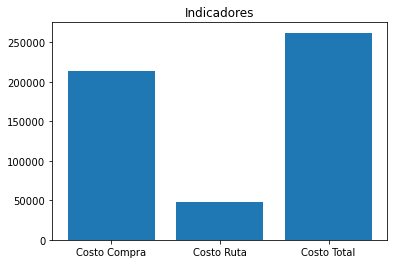

In [17]:
c_c, c_m, c_t = calcula_costos()
bar1= go.Figure(data = [go.Bar(x = ['Costo Compra', 'Costo Ruta', 'Costo Total'],
                               y = [c_c, c_m, c_t] ),])

layout = go.Layout(title = f"Costos",  xaxis_title = "Costos", 
                       yaxis_title = "Costo")

plt.bar(['Costo Compra', 'Costo Ruta', 'Costo Total'], [c_c, c_m, c_t])
plt.title('Indicadores') 
plt.show()  

## Créditos

**Autor(es):** Juan Manuel Betancourt Osorio, Juan David Reyes Jaimes

**Fecha última actualización:**: 04/08/2021